# <center><font color="green"> https://bit.ly/ptpjb-2021-04</font><br><font color="blue">04 - Exploratory Data Analysis ~ Visualization</font></center>

<center><img alt="" src="images/cover_ptpjb_2021.png"/></center> 

## <center><font color="blue">tau-data Indonesia</font><br>(C) Taufik Sutanto - 2021</center>
<center><a href="https://tau-data.id">https://tau-data.id</a> ~ <a href="mailto:taufik@tau-data.id">taufik@tau-data.id</a></center>

# <center><font color="blue"> Outline Exploratory Data Analysis (EDA) ~ Visualisasi</font></center>

* Pendahuluan Visualisasi
* Visualisasi Data Kategorik, Numerik, dan Kombinasinya.
* Visualisasi Time Series
* Visualisasi Spatial
* Study kasus energy buildings usage

# <center><font color="blue">  Pendahuluan Visualisasi </font></center>
<center><img alt="" src="images/Purpose_Visualize_Data.jpg" style="height: 300px;" /></center>

* Setelah melakukan data preprocessing, maka visualisasi dapat digunakan untuk:
 - Mengetahui apakah perlu preprocessing lebih lanjut.
 - Mendapatkan informasi/insight dasar dari data.
 - Mendapatkan hipotesis/dugaan untuk diuji dengan model di tahap berikutnya.
 - Kelak visualisasi juga digunakan untuk melakukan pelaporan performa/hasil prediksi model.
* Contoh (dasar/generik) tujuan visualisasi: monitor system, tracking (IKU/statistics), tell stories, show outliers/trends, support argumen, atau sekedar overview data (e.g. Kibana).

<img alt="" src="images/XII_EDA_ML.png" style="height: 200px;" />

In [ ]:
!pip install statsmodels folium chart_studio plotly
# dalam module ini kita membutuhkan beberapa module tambahan

In [4]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

In [5]:
# Importing CSV data  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
try:
    # Running Locally 
    price = pd.read_csv('data/price.csv')
except:
    # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
    price = pd.read_csv('data/price.csv')

In [6]:
# Dari Module sebelumnya - Bisa juga Load PreProcessed Data
price.drop("Observation", axis=1, inplace=True)
price.drop_duplicates(inplace=True)
price['Parking'] = price['Parking'].astype('category')
price['City_Category'] = price['City_Category'].astype('category')
price2 = price[np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())]
price2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Dist_Taxi      918 non-null    float64 
 1   Dist_Market    918 non-null    float64 
 2   Dist_Hospital  930 non-null    float64 
 3   Carpet         923 non-null    float64 
 4   Builtup        916 non-null    float64 
 5   Parking        931 non-null    category
 6   City_Category  931 non-null    category
 7   Rainfall       931 non-null    int64   
 8   House_Price    931 non-null    int64   
dtypes: category(2), float64(5), int64(2)
memory usage: 60.3 KB


## Apakah ada kecenderungan perbedaan harga rumah akibat dari tipe tempat parkir?

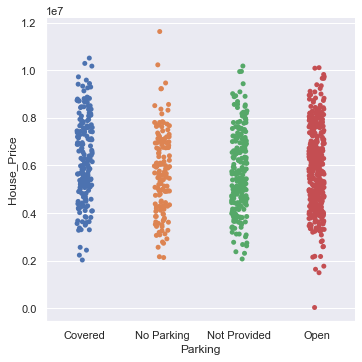

In [7]:
p= sns.catplot(x="Parking", y="House_Price", data=price2)
# Apa yang bisa dilihat dari hasil ini?

# Tambah dimensi di Visualisasi untuk melihat insight yang lebih jelas/baik 

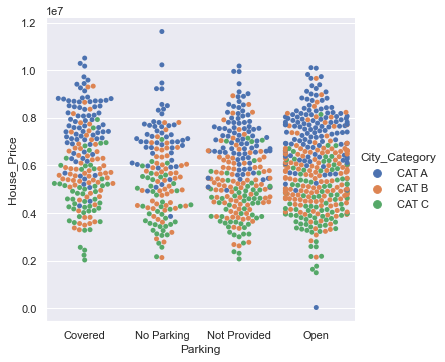

In [8]:
# Bisa juga plot dengan informasi dari 3 variabel sekaligus
# (untuk melihat kemungkinan faktor interaksi)
p= sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="swarm", data=price2)

# Ada informasi apakah dari hasil diatas?

# <center><font color="blue">1D Visualization: Bar Chart / Count Plot</font></center>
<center><img alt="" src="images/barchart.png" style="height: 300px;" /></center>

Image Source: https://datavizcatalogue.com/methods/bar_chart.html

# <center><font color="blue">Hati-hati: Bar Chart VS Histogram </font></center>
<center><img alt="" src="images/barchart_vs_histogram.png" style="height: 300px;" /></center>

image Source: https://www.mathsisfun.com/data/bar-graphs.html

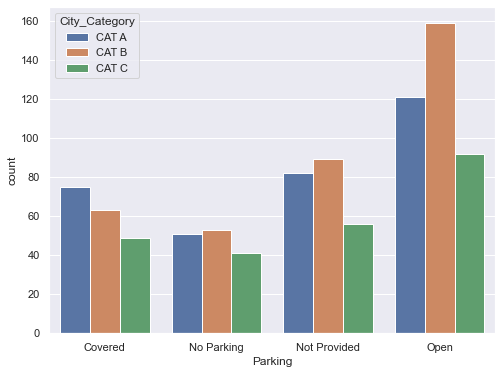

In [17]:
plt.figure(figsize=(8,6)) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
p = sns.countplot(x="Parking", hue="City_Category", data=price2)

# Horizontal? Why?

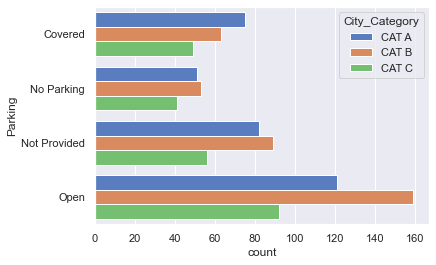

In [13]:
ax = sns.countplot(y = 'Parking', hue = 'City_Category', palette = 'muted', data=price2)

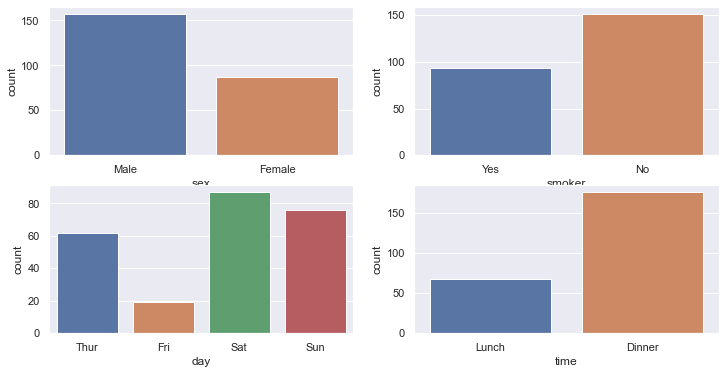

In [20]:
# Demo "SubPlot" tapi menggunakan data berbeda karena data price hanya punya 2 var kategori.

tips=sns.load_dataset('tips') # Data built-in dari Module Seaborn ... akan dijelaskan lebih lanjut di bawah.
categorical = tips.select_dtypes(include = ['category']).columns

fig, ax = plt.subplots(2, 2, figsize=(12, 6))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(tips[variable], ax=subplot)

# Adding labels? ... Hhhmmm...

In [12]:
price2.groupby(["Parking", "City_Category"]).size().unstack()

City_Category,CAT A,CAT B,CAT C
Parking,,,
Covered,75,63,49
No Parking,51,53,41
Not Provided,82,89,56
Open,121,159,92


In [10]:
def groupedbarplot(df, width=0.8, annotate="values", ax=None, **kw):
    ax = ax or plt.gca()
    n = len(df.columns)
    w = 1./n
    pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
    w *= width
    bars = []
    for col, x in zip(df.columns, pos):
        bars.append(ax.bar(np.arange(len(df))+x, df[col].values, width=w, **kw))
        for val, xi in zip(df[col].values, np.arange(len(df))+x):
            if annotate:
                txt = val if annotate == "values" else col
                ax.annotate(txt, xy=(xi, val), xytext=(0,2), 
                            textcoords="offset points",
                            ha="center", va="bottom")
    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df.index)
    return bars

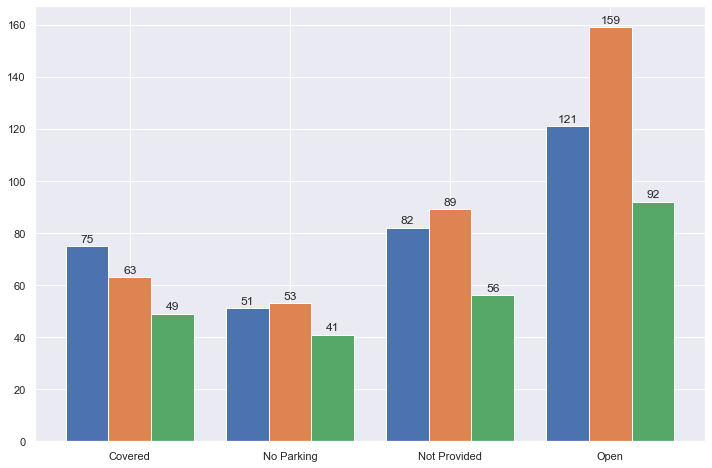

In [11]:
counts = price2.groupby(["Parking", "City_Category"]).size().unstack()
plt.figure(figsize=(12,8))
groupedbarplot(counts)
plt.show()

# Stacked/Segmented Chart

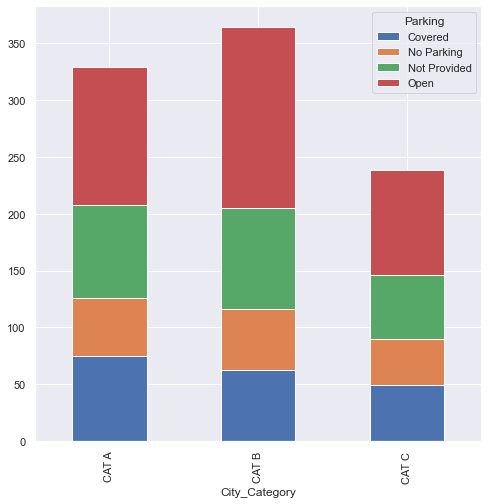

In [15]:
CT = pd.crosstab(index=price2["City_Category"], columns=price2["Parking"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

In [16]:
# ini dilakukan jika kita ingin menyimpan plotnya ke dalam suatu file
p.figure.savefig('barChart.png')
# lihat di folder ipynb-nya akan muncul file baru.

# Mosaic Plot for multiple categorical data analysis

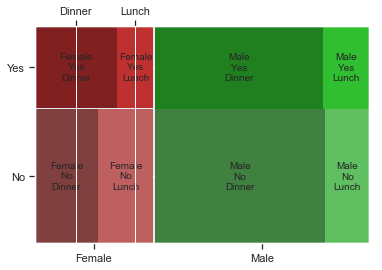

In [22]:
from statsmodels.graphics.mosaicplot import mosaic

p = mosaic(tips, ['sex','smoker','time'])

# <center><font color="blue">Pie Chart</font></center>
<center><img alt="" src="images/piechart.png" style="height: 400px;" /></center>

Image Source: https://datavizcatalogue.com/methods/pie_chart.html

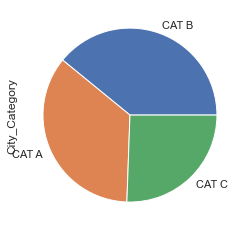

In [18]:
# PieChart
plot = price2.City_Category.value_counts().plot(kind='pie')

# Show Values?

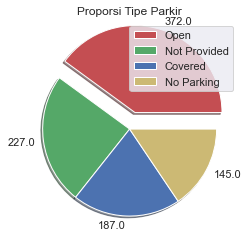

In [19]:
data = price2['Parking']

proporsion = Counter(data)
values = [float(v) for v in proporsion.values()]
colors = ['r', 'g', 'b', 'y']
labels = proporsion.keys()
explode = (0.2, 0, 0, 0)
plt.pie(values, colors=colors, labels= values, explode=explode, shadow=True)
plt.title('Proporsi Tipe Parkir')
plt.legend(labels, loc='best')
plt.show()

# <center><font color="blue">Box Plot</font></center>

<center><img alt="" src="images/boxplot.png" style="height: 350px;" /></center>

* Lower Extreme: $Q_1 - 1.5(Q_3-Q_1)$  Upper Extreme $Q_3 + 1.5(Q_3-Q_1)$
* Source: https://datavizcatalogue.com/methods/box_plot.html & https://lsc.deployopex.com/box-plot-with-jmp/

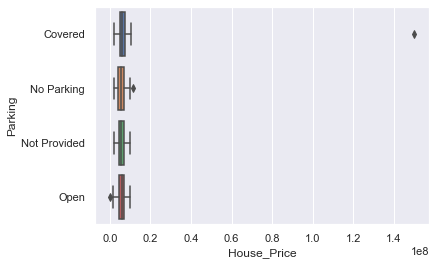

In [20]:
# Jika ada outlier grafiknya menjadi tidak jelas (data = price, bukan price2)
p = sns.boxplot(x="House_Price", y="Parking", data=price)

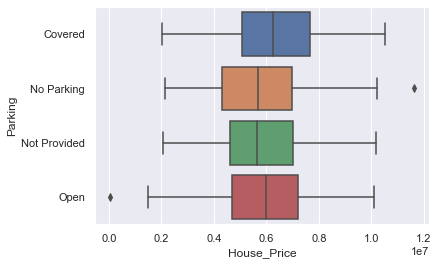

In [21]:
# BoxPlots
p = sns.boxplot(x="House_Price", y="Parking", data=price2)
# Apa makna pola yang terlihat di data oleh BoxPlot ini?

# Bagaimana mendapatkan data-data outliernya?

* Hati-hati beda iloc dan loc di Dataframe.
* Hati-hati Rumus Outlier Boxplot di SeaBorn!!!...

In [26]:
Q1 = price2['House_Price'].quantile(0.25)
Q3 = price2['House_Price'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range. 
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

outliers_ = (price2['House_Price'] < (Q1 - 1.5 *IQR)) # Outlier bawah
rumah_potensial = price2.loc[outliers_]
rumah_potensial

Q1=4658000.0, Q3=7180500.0, IQR=2522500.0


,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
811,NaN,NaN,NaN,NaN,NaN,Open,CAT A,440,30000


# Boxplot dapat juga dipisahkan berdasarkan suatu kategori

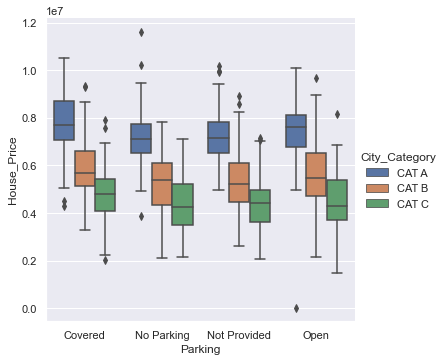

In [70]:
p = sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="box", data=price2)

* Ada dugaan/interpretasi (baru) apakah dari boxPlot diatas?
* Apakah kelemahan (PitFalls) Box Plot?

# Swarn Plot & Violin Plot

### Menangani kelemahan BoxPlot.

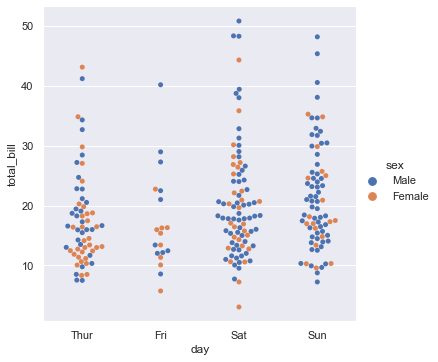

In [71]:
p= sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

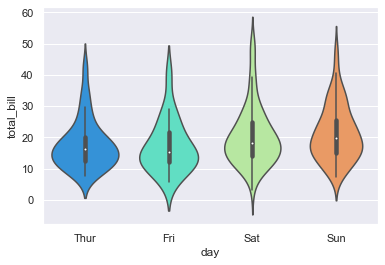

In [72]:
p = sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

# <center><font color="blue">histogram</font></center>

<center><img alt="" src="images/histogram.png" style="height: 300px;" /></center>

image source: https://datavizcatalogue.com/methods/histogram.html

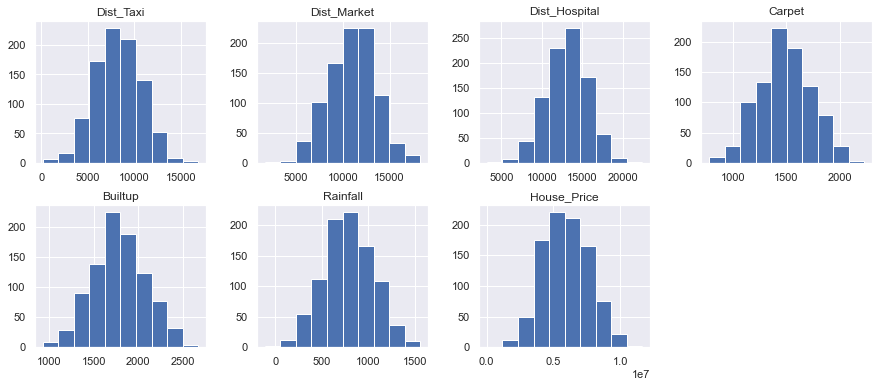

In [75]:
numerical = price2.select_dtypes(include = ['int64','float64']).columns

price2[numerical].hist(figsize=(15, 6), layout=(2, 4));

# <center><font color="blue">Scatter Plot</font></center>

<center><img alt="" src="images/scatter_plot.png" style="height: 350px;" /></center>

image source: https://datavizcatalogue.com/methods/scatterplot.html

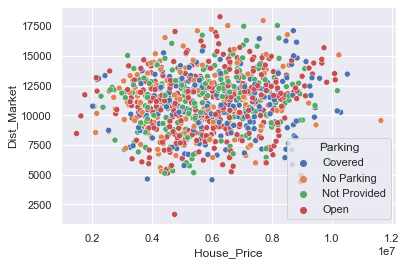

In [76]:
p = sns.scatterplot(x=price2['House_Price'], y=price2['Dist_Market'], hue = price2['Parking'])

# Bigger picture?

### Cara 01

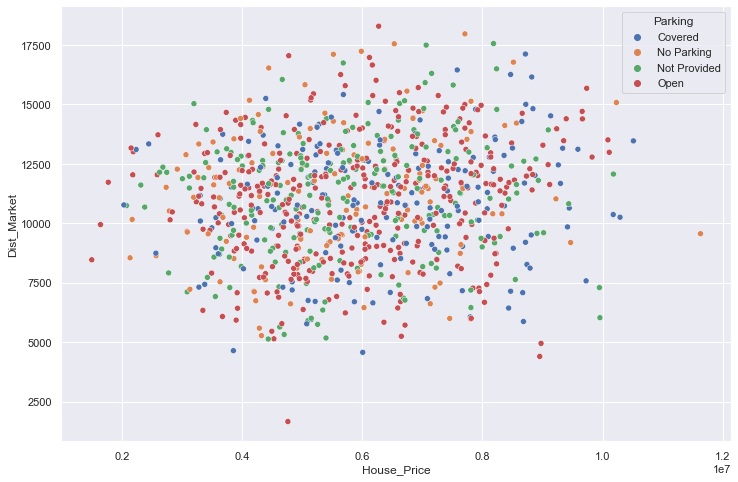

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

p = sns.scatterplot(x=price2['House_Price'], y=price2['Dist_Market'], hue = price2['Parking'], ax=ax)

# Joined

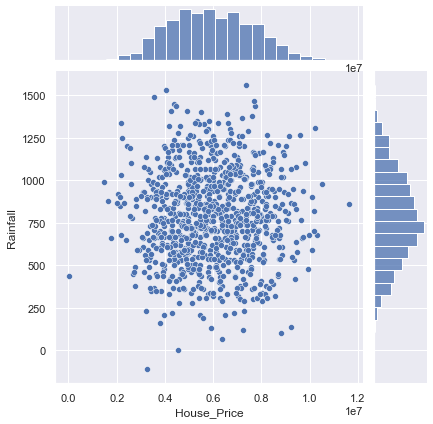

In [80]:
p = sns.jointplot(x=price2['House_Price'], y=price2['Rainfall'])

# Conditional Plot

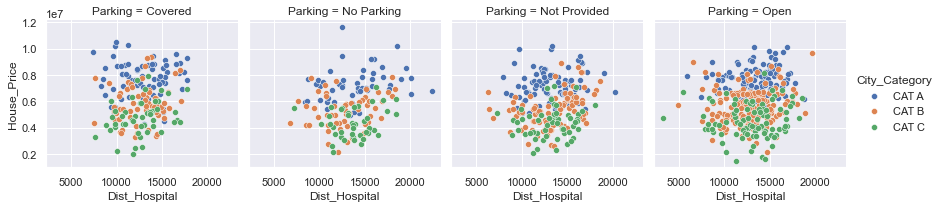

In [81]:
cond_plot = sns.FacetGrid(data=price2, col='Parking', hue='City_Category')#, hue_order=["Yes", "No"]
p = cond_plot.map(sns.scatterplot, 'Dist_Hospital', 'House_Price').add_legend()

# Pairwise Plot

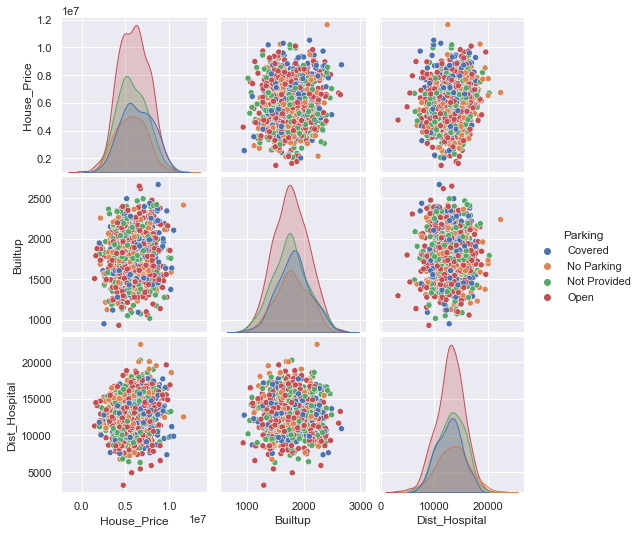

In [82]:
# Coba kita perhatikan sebagiannya saja dulu dan coba kelompokkan berdasarkan "Parking"
p = sns.pairplot(price2[['House_Price','Builtup','Dist_Hospital','Parking']], hue="Parking")
# Ada pola menarik?

# 3D Visualization: 3D Scatter Plot

https://pythonprogramming.net/matplotlib-3d-scatterplot-tutorial/

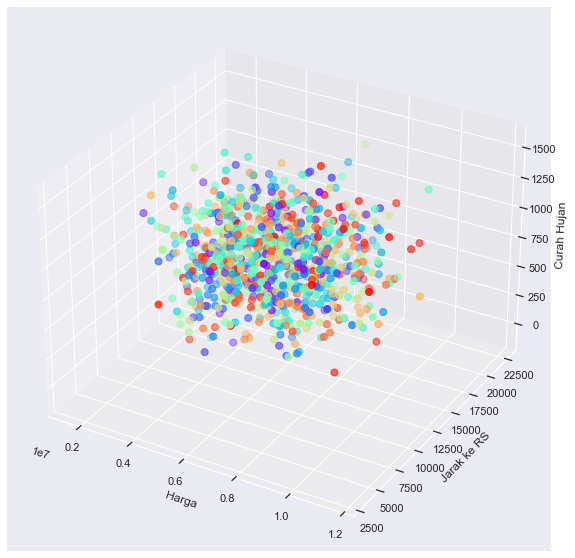

In [28]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
x = price2['House_Price']
y = price2['Dist_Hospital']
z = price2['Rainfall']
warna = cm.rainbow(np.linspace(0, 1, len(y)))

ax.scatter(x, y, z, s=50, c=warna, marker='o')
ax.set_xlabel('Harga')
ax.set_ylabel('Jarak ke RS')
ax.set_zlabel('Curah Hujan')
plt.show()

# 3D Visualization:  3D Bar Plots

Bar plots are used quite frequently in data visualisation projects since they’re able to convey information, usually some type of comparison, in a simple and intuitive way. The beauty of 3D bar plots is that they maintain the simplicity of 2D bar plots while extending their capacity to represent comparative information.

https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725

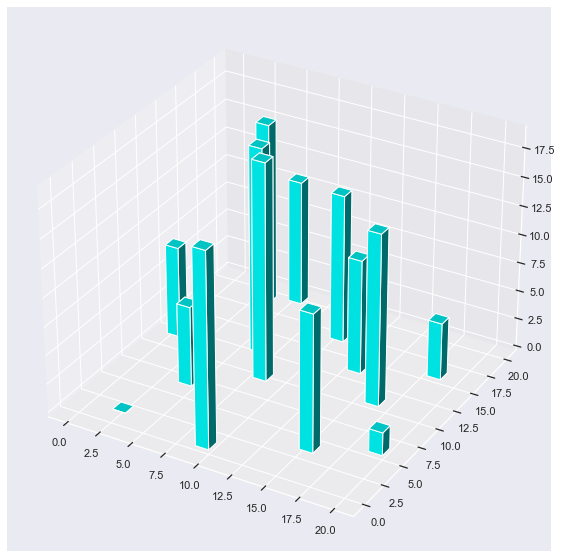

In [29]:
import random

fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection="3d")

num_bars = 15
x_pos = random.sample(range(20), num_bars)
y_pos = random.sample(range(20), num_bars)
z_pos = [0] * num_bars

x_size = np.ones(num_bars)
y_size = np.ones(num_bars)
z_size = random.sample(range(20), num_bars)

ax.bar3d(x_pos, y_pos, z_pos, x_size, y_size, z_size, color='aqua')
plt.show()

# Checking Correlations

In [86]:
price2.corr()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
Dist_Taxi,1.000000,0.449838,0.796853,0.010547,0.006286,0.020506,0.109612
Dist_Market,0.449838,1.000000,0.620136,-0.018603,-0.020581,0.069419,0.118755
Dist_Hospital,0.796853,0.620136,1.000000,0.011125,0.008617,0.050748,0.130522
Carpet,0.010547,-0.018603,0.011125,1.000000,0.998871,-0.045308,0.102092
Builtup,0.006286,-0.020581,0.008617,0.998871,1.000000,-0.042104,0.094550
Rainfall,0.020506,0.069419,0.050748,-0.045308,-0.042104,1.000000,0.013430
House_Price,0.109612,0.118755,0.130522,0.102092,0.094550,0.013430,1.000000


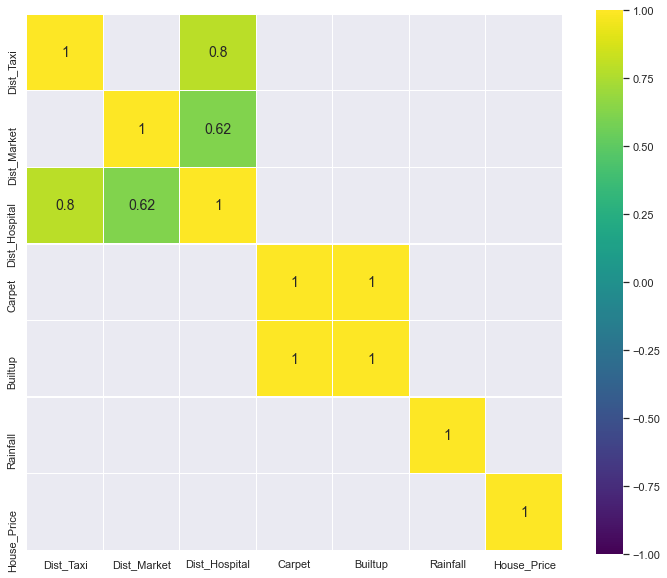

In [30]:
# HeatMap untuk menyelidiki korelasi
corr2 = price2.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

# Time Series Plot

# Datetime di Pandas

## References:

* https://towardsdatascience.com/a-complete-guide-to-time-series-data-visualization-in-python-da0ddd2cfb01
* https://machinelearningmastery.com/time-series-data-visualization-with-python/
* https://datascienceanywhere.medium.com/visualizing-time-series-data-in-python-e49fa5d10ea
* Dataset: https://github.com/rashida048/Datasets/blob/master/stock_data.csv

In [31]:
file_ = 'data/stock_data.csv'

try: # Running Locally, yakinkan "file_" berada di folder "data"
    df = pd.read_csv(file_, error_bad_lines=False, low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stock_data.csv
    df = pd.read_csv(file_, error_bad_lines=False, low_memory = False, encoding='utf8')

print(df.shape)
df.head()

(3019, 7)


,Date,Open,High,Low,Close,Volume,Name
0,1/3/2006,39.69,41.22,38.79,40.91,24232729,AABA
1,1/4/2006,41.22,41.90,40.77,40.97,20553479,AABA
2,1/5/2006,40.93,41.73,40.85,41.53,12829610,AABA
3,1/6/2006,42.88,43.57,42.80,43.21,29422828,AABA
4,1/9/2006,43.10,43.66,42.82,43.42,16268338,AABA


In [46]:
# Penting untuk cek Tipe Data Dataframe
# Perhatikan disini tipe data "Date" masih berupa string!!!....
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3019 non-null   object 
 1   Open      3019 non-null   float64
 2   High      3019 non-null   float64
 3   Low       3019 non-null   float64
 4   Close     3019 non-null   float64
 5   Volume    3019 non-null   int64  
 6   Name      3019 non-null   object 
 7   weekdays  3019 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 188.8+ KB


In [40]:
# Perhatikan sekarang "Date" tidak lagi berupa variable, tapi merupakan index bagi dataframenya
file_ = 'data/stock_data.csv'

try: # Running Locally, yakinkan "file_" berada di folder "data"
    df = pd.read_csv(file_, parse_dates=True, index_col = "Date", error_bad_lines=False, low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stock_data.csv
    df = pd.read_csv(file_, parse_dates=True, index_col = "Date", error_bad_lines=False, low_memory = False, encoding='utf8')

print(df.shape)
df.head()

(3019, 6)


,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


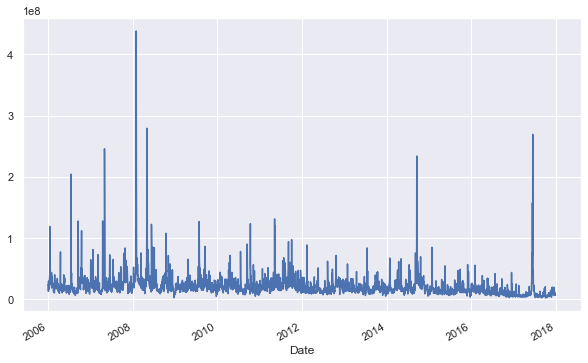

In [41]:
# Basic Plot Menggunakan fungsi di Pandas
df.sort_index(inplace=True) # Harus diyakinkan dulu data terurut waktu
p = df['Volume'].plot(figsize=(10,6))

# Hue : Menambahkan informasi hari

In [42]:
# Bisa menggunakan Fungsi "Map": silahkan dicoba sebagai latihan
hari_ = {0:"Senin", 1:"Selasa", 2:"Rabu", 3:"Kamis", 4:"Jumat", 5:"Sabtu", 6:"Minggu"}

df['weekdays'] = ['']*df.shape[0]
for i,d in df.iterrows():
    df.loc[i,'weekdays'] =  hari_[i.weekday()] # Perhatikan disini menggunakan i dan bukan d.Date karena waktu=index
df.head()

,Open,High,Low,Close,Volume,Name,weekdays
Date,,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA,Selasa
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,Rabu
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,Kamis
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,Jumat
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,Senin


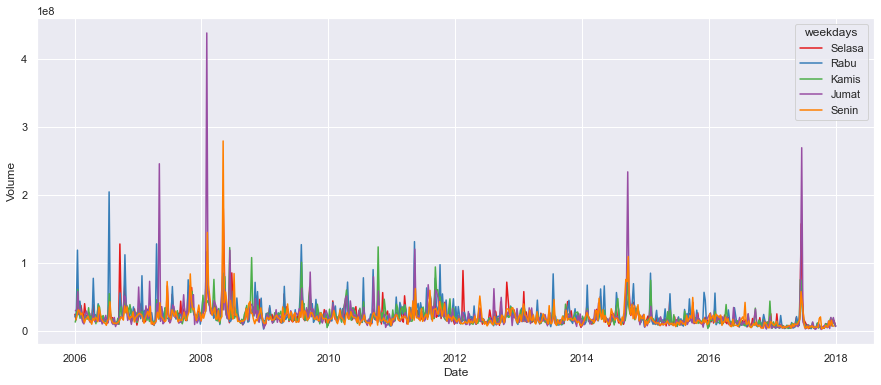

In [43]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Date', y='Volume', data=df, hue='weekdays', palette='Set1')
plt.show()
# We have our first insight!!!...

# SubPlot

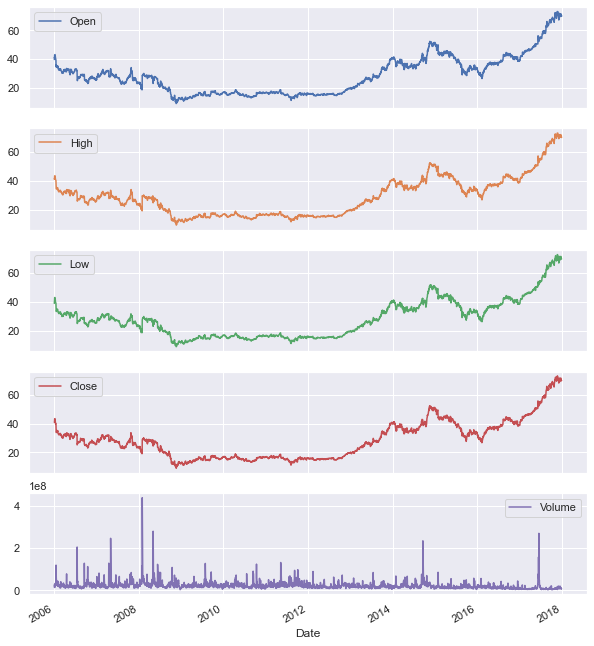

In [127]:
p = df.plot(subplots=True, figsize=(10,12))

# Seasonality

* Resampling berdasarkan bulan (month)
* Filter tahun >2016

In [44]:
# Reduce
df_month = df.resample("M").mean() # dirata-ratakan perbulan. hati-hati hanya bisa jika "waktu" adalah index
df_month.head()
# Perhatikan Date mulai 2006

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-31,38.245500,38.694000,37.641500,38.113000,3.400594e+07
2006-02-28,33.141579,33.436842,32.627368,32.975789,2.329848e+07
2006-03-31,31.333478,31.696957,30.929130,31.218696,2.095522e+07
2006-04-30,32.383684,32.790000,31.914737,32.283158,2.200768e+07
2006-05-31,31.744545,32.175455,31.171364,31.517273,2.218047e+07


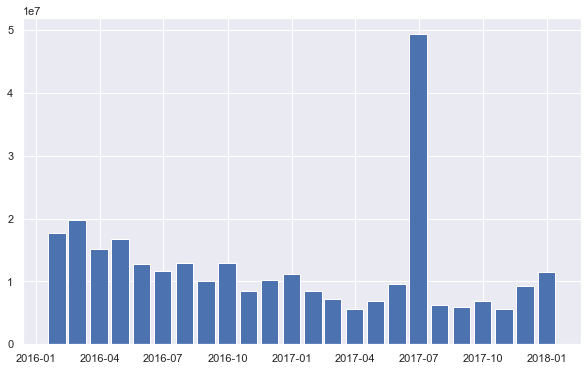

In [45]:
import matplotlib.dates as mdates # Need this additional function

fig, ax = plt.subplots(figsize=(10, 6))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # Supaya label lebih jelas
ax.bar(df_month['2016':].index, df_month.loc['2016':, "Volume"], width=25, align='center')

plt.show()

# Seaborn & Seasonality

* Butuh Kolom baru "Month"

In [46]:
# Latihan: ganti dengan "map" function
df['Month'] = ['']*df.shape[0]
for i,d in df.iterrows():
    df.loc[i,'Month'] =  i.month # Perhatikan disini menggunakan i dan bukan d.Date karena waktu=index
    
df.head()

,Open,High,Low,Close,Volume,Name,weekdays,Month
Date,,,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA,Selasa,1
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,Rabu,1
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,Kamis,1
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,Jumat,1
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,Senin,1


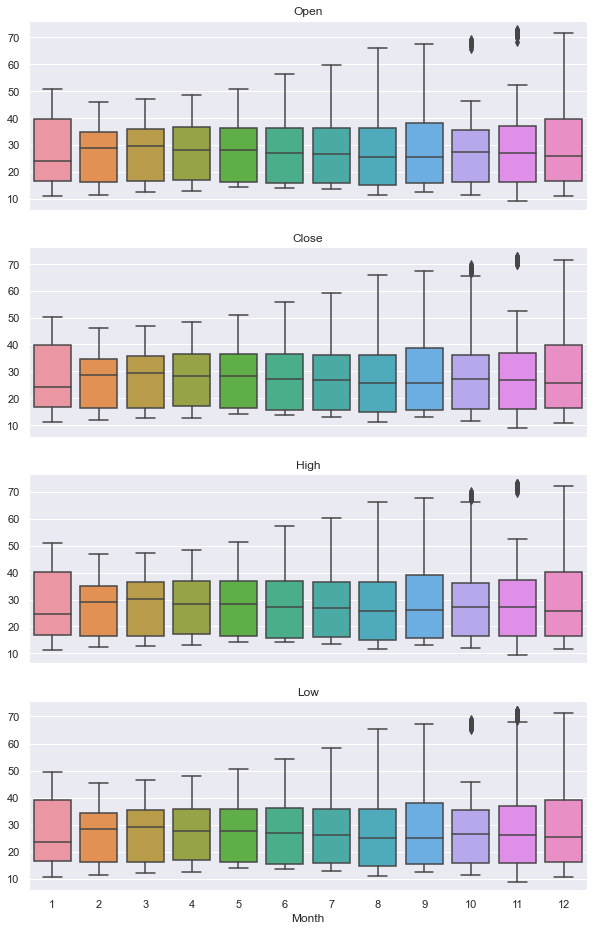

In [47]:
#start, end = '2016-01', '2016-12'
fig, axes = plt.subplots(4, 1, figsize=(10, 16), sharex=True)

for name, ax in zip(['Open', 'Close', 'High', 'Low'], axes):
    sns.boxplot(data = df, x='Month', y=name, ax=ax)
    ax.set_ylabel("")
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')

# Line Plot Revisited with resampling

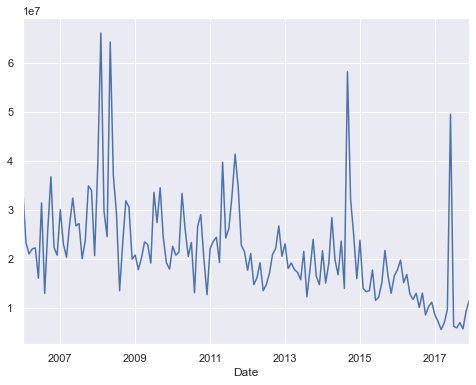

In [48]:
p = df_month['Volume'].plot(figsize=(8, 6))

# Resampling bisa juga berdasarkan minggu (dan contrasted with daily)

* Perhatikan Business understanding dengan baik.

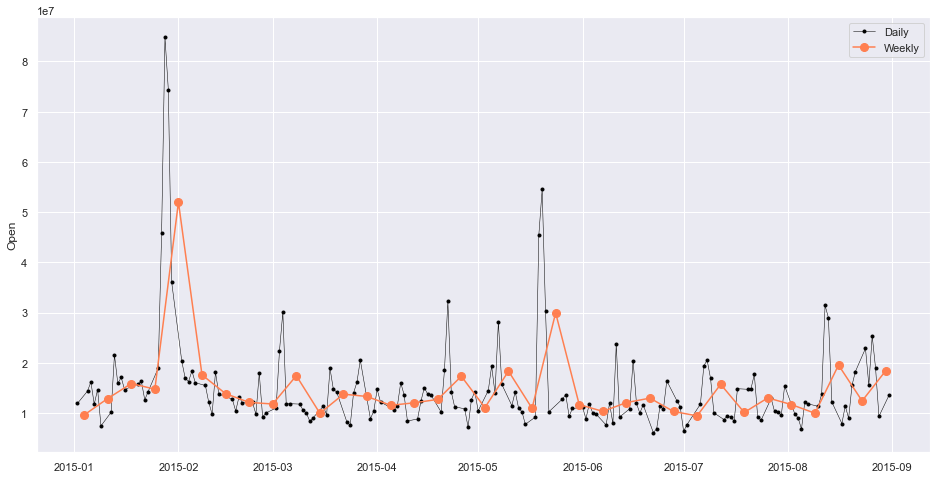

In [49]:
df_week = df.resample("W").mean()
start, end = '2015-01', '2015-08'

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(df.loc[start:end, 'Volume'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='black')
ax.plot(df_week.loc[start:end, 'Volume'], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral')

ax.set_ylabel("Open")
ax.legend()
plt.show()

# Rolling?

<img alt="" src="images/rolling_MA_pandas.png"  style="height: 200px;"/>

* moving average, also called a rolling or running average is used to analyze the time-series data by calculating averages of different subsets of the complete dataset. Since it involves taking the average of the dataset over time, it is also called a moving mean (MM) or rolling mean.
* https://www.datacamp.com/community/tutorials/moving-averages-in-pandas
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
* https://medium.com/@alexander.mueller/rolling-aggregations-on-time-series-data-with-pandas-80dee5893f9

In [51]:
# Contoh sederhana
df2 = pd.DataFrame({'B': [0, 1, 2, 3, 4]})
print(df2)
df2.rolling(2, win_type='triang').sum()

   B
0  0
1  1
2  2
3  3
4  4


,B
0,NaN
1,0.5
2,1.5
3,2.5
4,3.5


In [52]:
df_7d_rolling = df.rolling(window=7, center=False).mean() # Perhatikan centre = true !!!... 
df_7d_rolling.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN
2006-01-04,NaN,NaN,NaN,NaN,NaN
2006-01-05,NaN,NaN,NaN,NaN,NaN
2006-01-06,NaN,NaN,NaN,NaN,NaN
2006-01-09,NaN,NaN,NaN,NaN,NaN
2006-01-10,NaN,NaN,NaN,NaN,NaN
2006-01-11,41.852857,42.532857,41.441429,42.127143,2.082691e+07
2006-01-12,42.171429,42.642857,41.722857,42.124286,2.006818e+07
2006-01-13,42.140000,42.525714,41.558571,41.971429,2.155571e+07


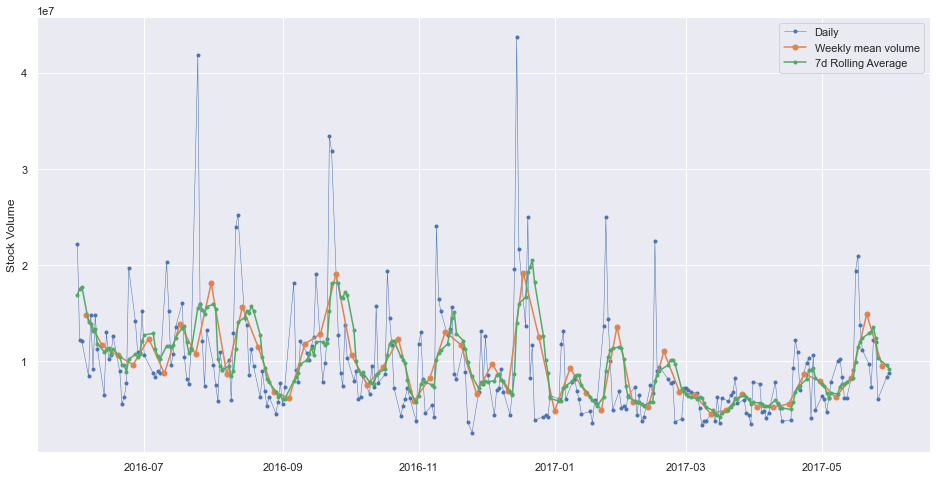

In [53]:
start, end = '2016-06', '2017-05'
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(df.loc[start:end, 'Volume'], marker='.', linestyle='-', 
        linewidth=0.5, label='Daily')
ax.plot(df_week.loc[start:end, 'Volume'], marker='o', markersize=5, 
        linestyle='-', label = 'Weekly mean volume')
ax.plot(df_7d_rolling.loc[start:end, 'Volume'], marker='.', linestyle='-', label='7d Rolling Average')

ax.set_ylabel('Stock Volume')
ax.legend()
plt.show()

# Memvisualisasikan Perubahan (Rasio dengan 1 hari sebelumnya)

* Menggunakan fungsi "Shift": The shift function shifts the data before or after the specified amount of time.
* https://pandas.pydata.org/docs/reference/api/pandas.Series.shift.html
* Fungsi Div (membagi), dalam hal ini dengan shift.
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.div.html
* https://www.geeksforgeeks.org/python-pandas-dataframe-shift/

In [54]:
df.head()

,Open,High,Low,Close,Volume,Name,weekdays,Month
Date,,,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA,Selasa,1
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,Rabu,1
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,Kamis,1
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,Jumat,1
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,Senin,1


In [55]:
df.Close.shift().head()

Date
2006-01-03      NaN
2006-01-04    40.91
2006-01-05    40.97
2006-01-06    41.53
2006-01-09    43.21
Name: Close, dtype: float64

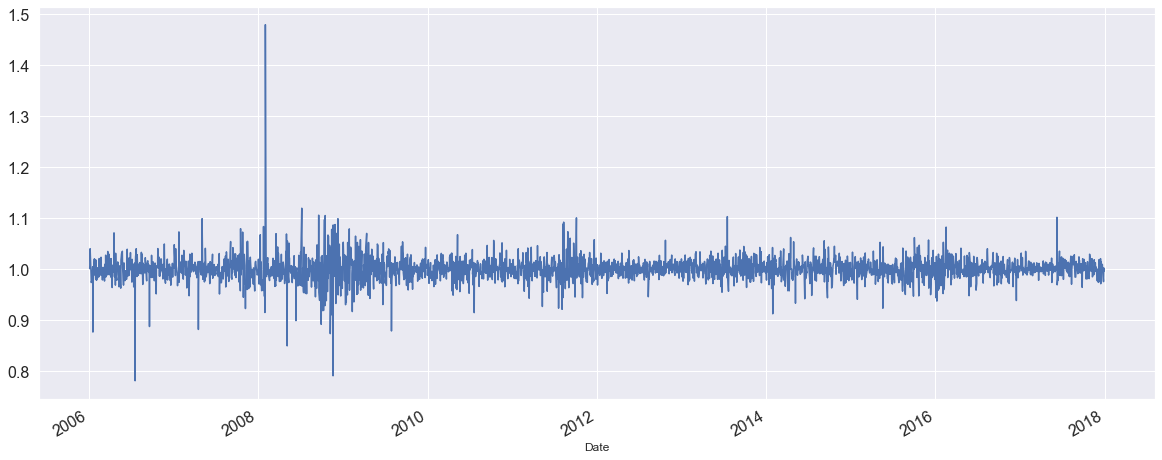

In [135]:
df['Change'] = df.Close.div(df.Close.shift())
p = df['Change'].plot(figsize=(20, 8), fontsize = 16)

In [136]:
df.head() # perhatikan di kolom "Change"

,Open,High,Low,Close,Volume,Name,weekdays,Change
Date,,,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA,Selasa,NaN
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,Rabu,1.001467
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,Kamis,1.013669
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,Jumat,1.040453
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,Senin,1.004860


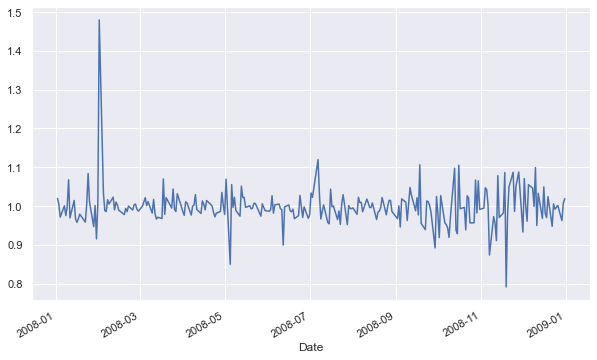

In [137]:
# Zoom to a year
p = df.loc['2008']['Change'].plot(figsize=(10, 6))

# Percent_Change

* Percentage change between the current and a prior element.
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html

In [56]:
df_month.loc[:, 'pct_change'] = df.Close.pct_change()*100

df_month.head()

,Open,High,Low,Close,Volume,pct_change
Date,,,,,,
2006-01-31,38.245500,38.694000,37.641500,38.113000,3.400594e+07,-1.911555
2006-02-28,33.141579,33.436842,32.627368,32.975789,2.329848e+07,-2.076970
2006-03-31,31.333478,31.696957,30.929130,31.218696,2.095522e+07,-0.493523
2006-04-30,32.383684,32.790000,31.914737,32.283158,2.200768e+07,NaN
2006-05-31,31.744545,32.175455,31.171364,31.517273,2.218047e+07,-1.281250


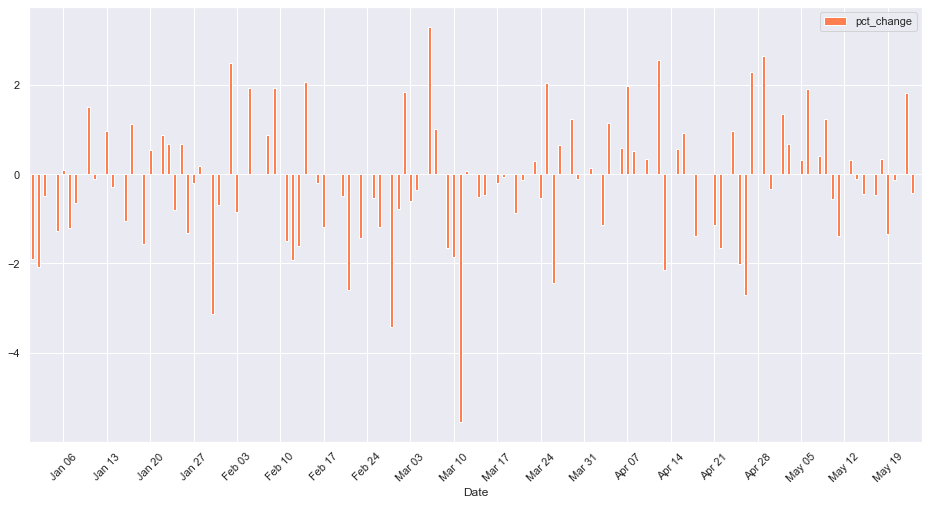

In [61]:
fig, ax = plt.subplots(figsize=(16, 8))
df_month['pct_change' ].plot(kind='bar', color='coral', ax=ax)

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)
ax.legend()

plt.show()

# Expanding Window: Akumulasi Data

* Bayangkan seperti jumlah total kasus Covid, tapi lebih fleksible karena bisa juga menggunakan rata-rata atau simpangan baku.
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.expanding.html

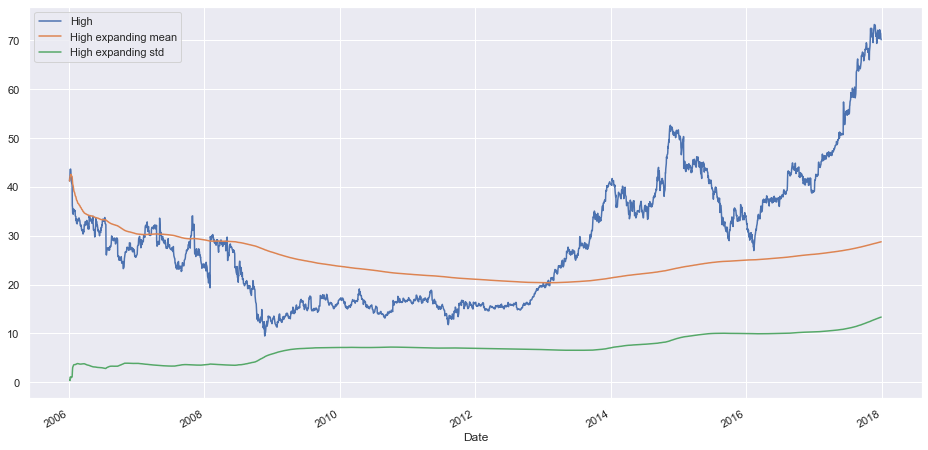

In [62]:
fig, ax = plt.subplots(figsize=(16, 8))

ax = df.High.plot(label='High')
ax = df.High.expanding().mean().plot(label='High expanding mean')
ax = df.High.expanding().std().plot(label='High expanding std')

ax.legend(); plt.show()

# Heat Map

* Jauh lebih mudah untuk mendapatkan insight
* Butuh untuk menyesuaikan "Struktur Data"-nya.
* Butuh tambahan kolom "Year
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
* https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [112]:
# Latihan: ganti dengan "map" function
df['Year'] = ['']*df.shape[0]
for i,d in df.iterrows():
    df.loc[i,'Year'] =  i.year # Perhatikan disini menggunakan i dan bukan d.Date karena waktu=index
    
df.head()

,Open,High,Low,Close,Volume,Name,weekdays,Month,Change,Year
Date,,,,,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA,Selasa,1,NaN,2006
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,Rabu,1,1.001467,2006
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,Kamis,1,1.013669,2006
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,Jumat,1,1.040453,2006
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,Senin,1,1.004860,2006


In [113]:
all_month_year_df = pd.pivot_table(df, values="Open",
                                   index=["Month"],
                                   columns=["Year"],
                                   fill_value=0,
                                   margins=True)
named_index = [[calendar.month_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_df.index)]] # name months
all_month_year_df = all_month_year_df.set_index(named_index)
all_month_year_df.head()

Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,All
Jan,38.245500,27.990500,21.926667,12.084500,16.572105,16.441000,15.719500,19.866667,39.268571,48.310500,30.250526,42.256000,27.439336
Feb,33.141579,30.297368,28.884000,12.601053,15.252632,16.778421,15.445500,20.623684,37.397895,43.861579,29.107000,44.916316,27.321515
Mar,31.333478,30.549545,28.070000,13.255455,16.256087,16.663043,14.986818,22.673000,37.975238,43.929091,34.064545,46.230870,27.995209
Apr,32.383684,30.021000,27.930000,13.802381,17.462500,16.853500,15.231500,23.988636,35.254762,44.590476,36.873810,47.207895,28.401504
May,31.744545,29.288182,26.731905,14.903000,15.965000,17.020476,15.405000,26.160455,34.852857,43.475500,36.822381,49.645909,28.583543


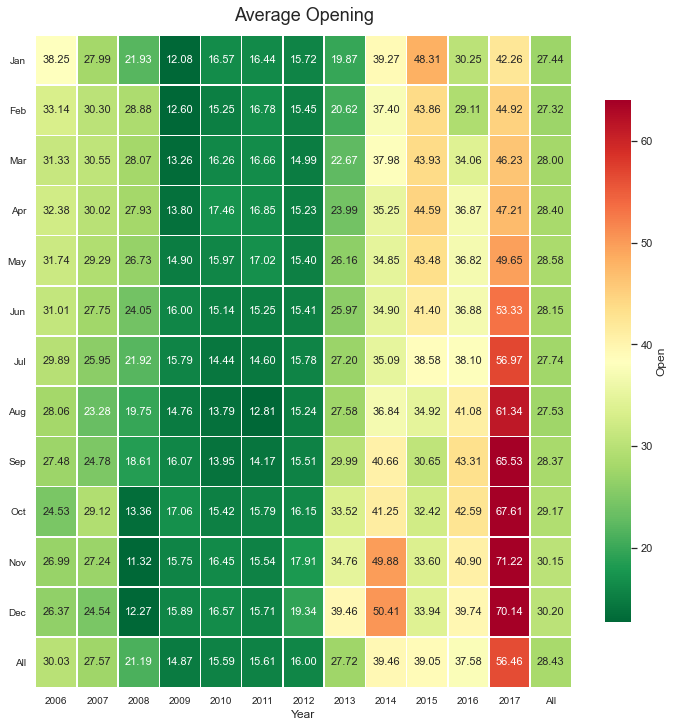

In [117]:
fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(all_month_year_df, cmap='RdYlGn_r', robust=True, fmt='.2f', 
                 annot=True, linewidths=.5, annot_kws={'size':11}, 
                 cbar_kws={'shrink':.8, 'label':'Open'}, ax=ax)                       
    
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.title('Average Opening', fontdict={'fontsize':18},    pad=14);

plt.show()

# Spatial Visualization

In [64]:
def generateBaseMap(default_location=[-0.789275, 113.921], default_zoom_start=5):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [66]:
# Load Data
try:
    # Running Locally, yakinkan module folium sudah terinstall
    df_loc = pd.read_csv('data/df_loc.csv')
except:
    # Running in Google Colab, yakinkan folder "data" sudah ada
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/df_loc.csv
    df_loc = pd.read_csv('data/df_loc.csv')
    
df_loc.head()

,lat,lon,count
0,-6.87602,107.620,1
1,-7.79558,110.369,1
2,-6.87848,107.426,1
3,-6.12889,106.180,1
4,-6.20876,106.846,1


In [67]:
import folium
from folium.plugins import HeatMap

base_map = generateBaseMap()
HeatMap(data=df_loc[['lat', 'lon', 'count']].groupby(['lat', 'lon']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
base_map

# Hati-hati Chrome terbaru suka bermasalah dengan Folium jika datanya cukup besar

# <center><font color="blue"> Studi Kasus (Latihan): Penggunaan Energi Gedung</font></center>

<img alt="" src="images/Ashrae-Energy-Prediction.jpg" style="height: 200px;" />

<font color="green"> Deskripsi</font>

* Studi Kasus kali ini berasal dari Permasalahan Prediksi Penggunaan Energi Gedung dari PT Ashrae - American Society of Heating, Refrigerating and Air-Conditioning Engineers https://www.ashrae.org/about
* Sebagai latihan studi kasus EDA kita hanya akan menggunakan sebagian dari data yang ada.
* Data lengkap dan keterangan: https://www.kaggle.com/c/ashrae-energy-prediction/data
* Data berupa 3 buah file CSV: Informasi Tentang Gedung, Penggunaan Energi Gedung, dan Cuaca.
* Permasalahan utama dari kasus ini sebenarnya adalah forecasting/peramalan penggunaan energi. Akan tetapi di module 03 dan 04 ini kita hanya akan melakukan EDA pada data yang ada.
* Hasil EDA ini kelak akan kita gunakan untuk melakukan analisis lebih lanjut.

<font color="green"> Metadata</font>

* Variabel di Data Gedung "**gd**":
    - site_id & building_id: id lokasi dan gedung
    - primary_use: Peruntukan Gedung
    - square_feet: Luas bangunan gedung
    - year_built: Tahun pembuatan gedung
    - floor_count: Banyaknya lantai yang ada di gedung.
* Variabel di Data Energy Gedung "**en**" (selain building_id):
    - meter	: Jenis meter reading penggunaan energy gedung.
    - timestamp	: Waktu saat pengukuran (per-jam)
    - meter_reading: Penggunaan energy.
* Variabel di Data Cuaca "**cu**" (selain site_id & timestamp):
    - air_temperature: suhu udara
    - cloud_coverage: ukuran berawan	
    - dew_temperature: suhu dew (menbun?)
    - precip_depth_1_hr: precipitation (banyaknya air dari langit, karena sebab apapun)
    - sea_level_pressure: Tekanan permukaan laut.	
    - wind_direction & wind_speed: arah dan kecepatan angin

# <center><font color="blue"> Task</font></center>

* Silahkan lakukan EDA dengan melakukan beberapa ha berikut:
    - Preprocessing data apa saja yang perlu dilakukan?
    - Gunakan statistika deskriptif & visualisasi untuk menghasilkan berbagai informasi/insight dari data yang ada.
* Loading data diatas diberikan di cell dibawah ini.

In [69]:
file_00 = 'data/ashrae-energy_building_metadata.csv'
file_01 = 'data/ashrae-energy_train_sample.csv'
file_02 = 'data/ashrae-energy_weather_test.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    gd = pd.read_csv(file_00, error_bad_lines=False, low_memory = False, encoding='utf8') #gedung
    en = pd.read_csv(file_01, error_bad_lines=False, low_memory = False, encoding='utf8') #energy
    cu = pd.read_csv(file_02, error_bad_lines=False, low_memory = False, encoding='utf8') #cuaca
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/ptpjb/master/data/ashrae-energy_building_metadata.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/ptpjb/master/data/ashrae-energy_train_sample.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/ptpjb/master/data/ashrae-energy-weather_test.csv
    gd = pd.read_csv(file_00, error_bad_lines=False, low_memory = False, encoding='utf8') #gedung
    en = pd.read_csv(file_01, error_bad_lines=False, low_memory = False, encoding='utf8') #energy
    cu = pd.read_csv(file_02, error_bad_lines=False, low_memory = False, encoding='utf8') #cuaca

print("Ukuran Data Gedung={}, Data Train={}, Data Weather={}".format(gd.shape, en.shape, cu.shape))
gd.head()

Ukuran Data Gedung=(1449, 6), Data Train=(500000, 4), Data Weather=(277243, 9)


,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [5]:
cu.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6


In [6]:
en.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [ ]:
# jawaban diberikan mulai dari cell ini, silahkan buat cell baru sesuai kebutuhan (alt+Enter)



# <center><font color="blue"> Akhir Modul 04 - Exploratory Data Analysis ~ Visualization

<hr />
<img alt="" src="images/meme-cartoon/meme visualization.jpg" style="height: 400px;"/>